# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [31]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

In [32]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [33]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


C:\Users\benbahtin\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


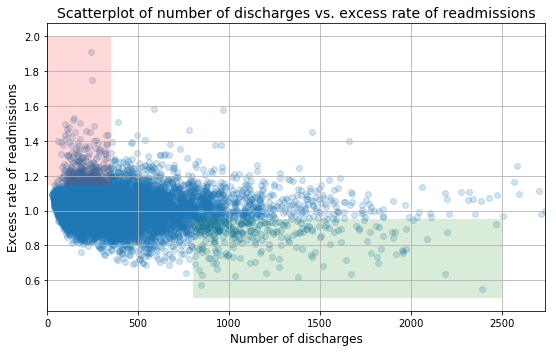

In [34]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

## Answers to the questions

#### A. Do you agree with the above analysis and recommendations? Why or why not?

I partially agree with the plot-based initial observations. In contrary to the initial observation, the number of discharges beyond 2000 seems to have higher rate of readmission. Perhaps, the upper limit of the area shaded green should be at 2000 (see the histogram at the bottom).

In [35]:
a= clean_hospital_read_df.loc[:,['Number of Discharges','Excess Readmission Ratio']]
print('Total Number of observations= %d'  % len(a))
print('Number of observationsa with less than 100 number of admission rate = %d' % len(a[a['Number of Discharges'] < 100]))

# mean of excess readmission with number of discharge less than 100
print(a[a['Number of Discharges'] < 100].mean())

# mean of excess readmission with number of discharge  greater than 1000
print(a[a['Number of Discharges'] > 1000].mean())

Total Number of observations= 11578
Number of observationsa with less than 100 number of admission rate = 1269
Number of Discharges        69.947991
Excess Readmission Ratio     1.022618
dtype: float64
Number of Discharges        1383.427646
Excess Readmission Ratio       0.978335
dtype: float64


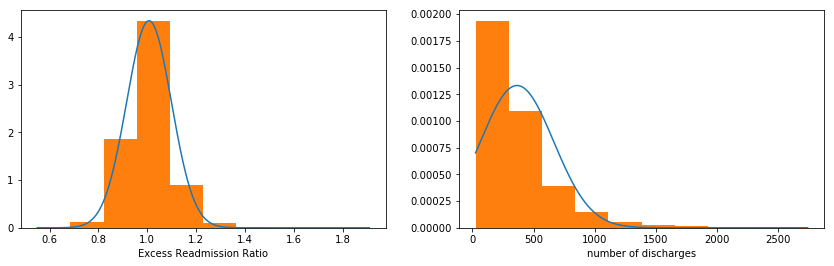

In [64]:
# Sample distribution of sampling mean for the Excess readmission ratio
y.sort()
hmean = np.mean(y)
hstd = np.std(y)
pdf = stats.norm.pdf(y, hmean, hstd)

# Sample distribution of sampling mean for the number of discharges
x.sort()
xmean = np.mean(x)
xstd = np.std(x)
pdf1 = stats.norm.pdf(x, xmean, xstd)

plt.subplot(1,3,1)
plt.plot(y, pdf)
plt.hist(y,normed=True)
plt.xlabel('Excess Readmission Ratio')

plt.subplot(1,3,2)
plt.plot(x, pdf1)
plt.hist(x,normed=True)
plt.xlabel('number of discharges')

plt.subplots_adjust(right=3)


The excessive readmission ratio looks to have a symmetric distribution, while the number of discharge is showing a right-skewed distribution (which might indicate that the mean is greater than the median).

In [36]:
# Percent of excess readmission rate greater than 1 with the number of discharge at less than 100
b = a[a['Number of Discharges'] < 100]

readmit_b=((len(b[b['Excess Readmission Ratio'] > 1]))/(len(b)))*100
print('Excess readmission rate with <100 ND= %0.2f' % readmit_b)

# Percent of excess readmission rate greater than 1 with the number of discharge at greater than 1000
c = a[a['Number of Discharges'] > 1000]

readmit_c=((len(c[c['Excess Readmission Ratio'] > 1]))/(len(c)))*100
print('Excess readmission rate with >100 ND= %0.2f' % readmit_c)

Excess readmission rate with <100 ND= 59.18
Excess readmission rate with >100 ND= 44.49


The above statistic result shows:

1. In hospitals/facilities with number of discharges < 100, the mean excess readmission rate is 1.023 and 59.2 % (which was previously reported as 63%) have excess readmission rate greater than 1.  

2. In hospitals/facilities with number of discharges > 1000, the mean excess readmission rate is 0.978 and 44.5 % (which was previously reported as 44%) have excess readmission rate greater than 1.

It seems that there was a small descripancy that should be looked over and evaluated further.

#### B. Provide support for your arguments and your own recommendations with a statistically sound analysis

Let us set up the hypothesis test:

Null hypothesis, Ho: The excess readmission rate is equal to 1.

Alternative hypothesis, Ha: The excess readmission rate is greater than 1.


In [37]:
import scipy.stats as stats

In [63]:
# compute sample mean and standard deviation

mean_ERR = np.mean(y)
print('Mean of Excess Readmission Ratio =%0.3f' % mean_ERR)

std_ERR = np.std(y)
print('standard deviation of Excess Readmission Ratio =%0.3f' % std_ERR)

# Estimate Z-score

Z =(1.008-1)/(0.092/math.sqrt(11497))
print('Z-score =%0.3f' % Z)

## P-value is 0 for the Z-score of 9.324

Mean of Excess Readmission Ratio =1.008
standard deviation of Excess Readmission Ratio =0.092
Z-score =9.324


As the P-value was found to be zero, which is less than the significance level at α = 0.01, we reject the null hypothesis and the findings are statistically significant.

#### 5. Advantages and disavantages of using the scatterplot above

It is preferable to plot the dataset in scatterplot, as the data is large. The distribution, minimum, maximum values of the observations is clearly displayed. Moreover, some correlation with outliers can be observed. However, the scatter plot did not display clearly the relationship between the two variables. There are a lot of scattered observations all over. After converting the continuous data of the number of discharges into categorical data and displaying it in histogram, the pattern between the two variables can be clearly seen (see below). The mean and median of the excessive readmission ratio seem to be not too much different, indicating a symmetric distribution. The excessive readmission ratio decreased with the increase in the number of discharge which is less than 2000. However, the two variables appeared to have a positive relationship at the number of discharges greater than 2000.

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: S

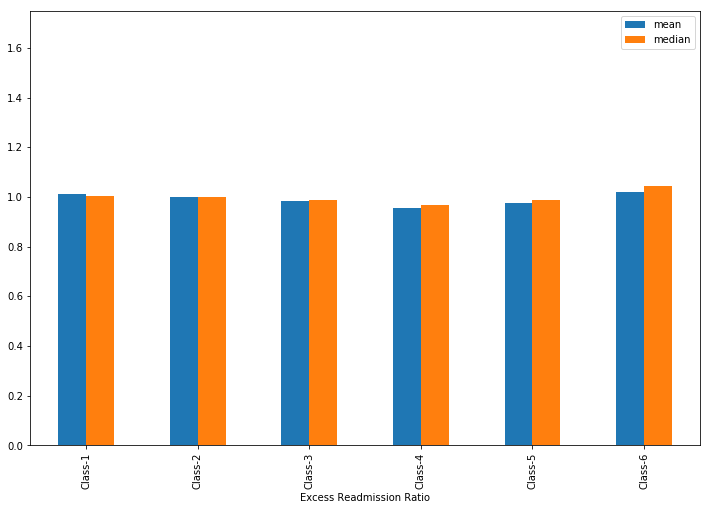

In [69]:
a['discharge_range'] = ' '
a['discharge_range'][(a['Number of Discharges'] >= 0) & (a['Number of Discharges'] < 500)] = 'Class-1'
a['discharge_range'][(a['Number of Discharges'] >= 500) & (a['Number of Discharges'] < 1000)] = 'Class-2'
a['discharge_range'][(a['Number of Discharges'] >= 1000) & (a['Number of Discharges'] < 1500)] = 'Class-3'
a['discharge_range'][(a['Number of Discharges'] >= 1500) & (a['Number of Discharges'] < 2000)] = 'Class-4'
a['discharge_range'][(a['Number of Discharges'] >= 2000) & (a['Number of Discharges'] < 2500)] = 'Class-5'
a['discharge_range'][a['Number of Discharges'] >= 2500] = 'Class-6'


a_hist = a.groupby('discharge_range',as_index=True)['Excess Readmission Ratio'].agg(['mean', 'median'])

a_hist.plot(kind='bar',figsize=(12,8),ylim=[0, 1.75]).set_xlabel('Excess Readmission Ratio')